# 데이터 불러오기
- 이미 정제된 데이터

In [1]:
import pandas as pd
df = pd.read_csv('../datasets/빅분기 실기 데이터/house_price.csv', encoding='utf-8')
df.head(10)

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000
5,38,4.3403,0.268350,1.768000,5.068000,500000
6,25,3.9696,0.116477,2.911765,10.352941,500000
7,34,3.7306,0.272993,1.507270,3.864297,500000
8,29,3.6250,0.258112,1.626728,4.213518,500000
9,29,3.6121,0.277360,1.719258,4.006961,500000


array([[<AxesSubplot: title={'center': 'housing_age'}>,
        <AxesSubplot: title={'center': 'income'}>],
       [<AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'households'}>],
       [<AxesSubplot: title={'center': 'rooms'}>,
        <AxesSubplot: title={'center': 'house_value'}>]], dtype=object)

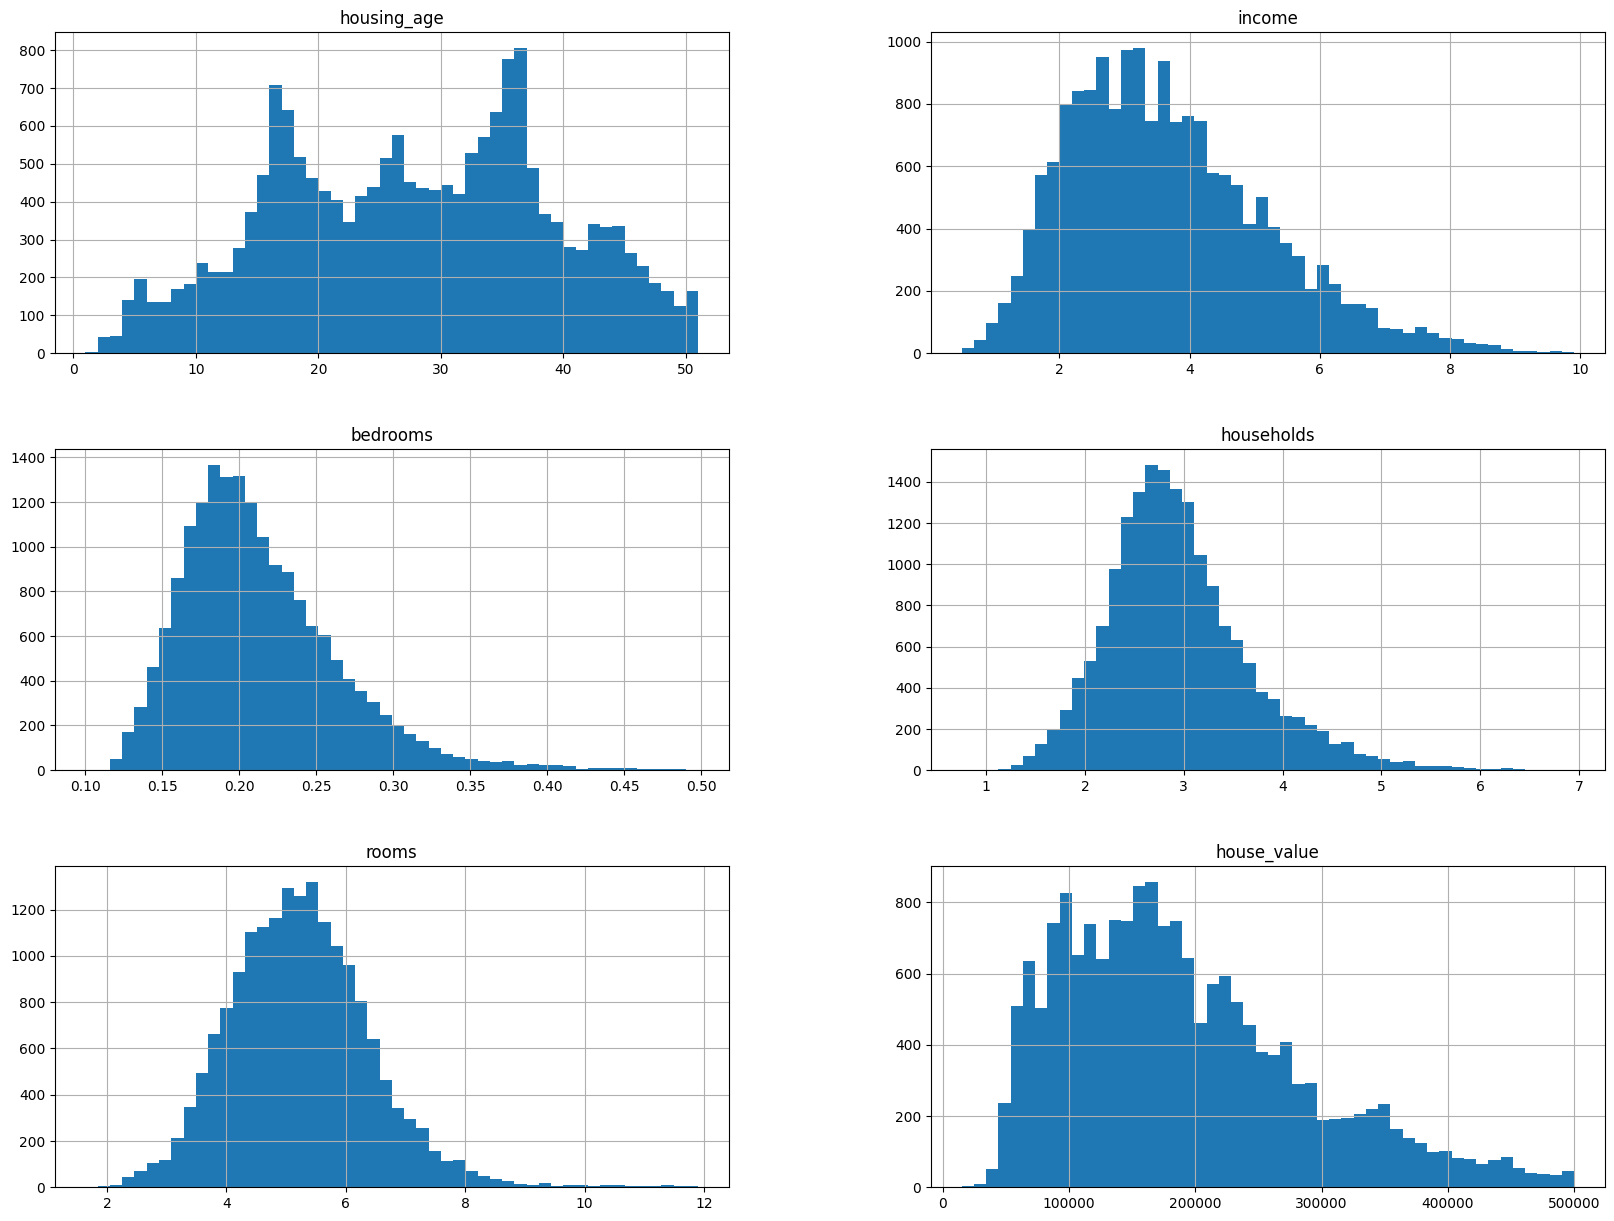

In [3]:
df.hist(bins=50, figsize=(20,15))

# train / test 데이터 나누기

In [4]:
X = df.drop('house_value', axis=1)
y = df[['house_value']]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

# 정규화

In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [7]:
scaler_minmax.fit(X_train)
X_train_minmax = scaler_minmax.transform(X_train)

In [8]:
scaler_standard.fit(X_train)
X_train_standard = scaler_standard.transform(X_train)

## test 데이터 정규화

In [9]:
X_test_minmax = scaler_minmax.transform(X_test)

X_test_standard = scaler_standard.transform(X_test)

# 모델 학습

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_minmax, y_train)

pred = model.predict(X_test_minmax)
model.score(X_test_minmax, y_test)

0.5762058203844436

## 모델 평가 지표

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

# MSE / RMSE
MSE = mean_squared_error(y_test, pred)
print(MSE)
np.sqrt(MSE)

3894709083.7083945


62407.604374053604

In [12]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

46869.67264842266

In [15]:
# MAPE
MAPE = np.mean(np.abs((y_test-pred)/y_test))*100
MAPE

c:\Users\qkrtj\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


house_value    30.76542
dtype: float64

In [16]:
# MPE
np.mean((y_test-pred)/y_test)*100

c:\Users\qkrtj\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


house_value   -11.87693
dtype: float64

# 예측값 병합 및 저장

In [17]:
pred_test = model.predict(X_test_minmax)
y_test['y_pred'] = pred_test
y_test

,house_value,y_pred
2804,284700,195167.004138
3760,259200,146530.929180
1230,354200,187427.914143
8881,170700,255964.676224
11873,135400,158332.305716
...,...,...
6063,213900,188141.099229
4765,236000,149187.994552
13880,106600,134347.435452
16497,69600,60857.253493


In [18]:
total_test = pd.concat([X_test, y_test], axis=1)
total_test

,housing_age,income,bedrooms,households,rooms,house_value,y_pred
2804,36,2.7222,0.234005,1.728814,4.297552,284700,195167.004138
3760,21,2.9800,0.202828,2.512871,4.900990,259200,146530.929180
1230,45,2.7266,0.202922,1.754917,4.763994,354200,187427.914143
8881,45,5.1057,0.179707,3.592105,5.381579,170700,255964.676224
11873,25,3.1884,0.206922,2.798450,5.188630,135400,158332.305716
...,...,...,...,...,...,...,...
6063,46,3.0870,0.234724,3.245203,4.396588,213900,188141.099229
4765,33,2.9896,0.235594,3.804494,4.406742,236000,149187.994552
13880,50,1.8250,0.228715,2.658537,4.841463,106600,134347.435452
16497,22,2.3365,0.182566,3.815603,6.468085,69600,60857.253493
